<a href="https://colab.research.google.com/github/Cesarppz/Linux/blob/master/ia/ml/Modelo_entrenado_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch 
from torchvision import utils, models, transforms , datasets

from PIL import Image
import urllib.request as request

import matplotlib.pyplot as plt

# Modelo pre entrenado

---


In [ ]:
inceptions = models.inception_v3(pretrained=True) #LO que hago es cargar un modelo de la librería, con los valores predeterminados

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


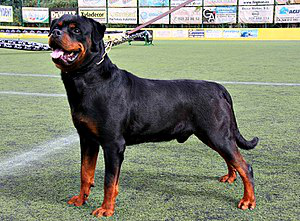

In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fb/02_I_Exposici%C3%B3n_Monogr%C3%A1fica_Club_Rottweiler_de_Espa%C3%B1a_-_Santa_Brigida_-_Gran_Canaria.jpg/300px-02_I_Exposici%C3%B3n_Monogr%C3%A1fica_Club_Rottweiler_de_Espa%C3%B1a_-_Santa_Brigida_-_Gran_Canaria.jpg'
img = request.urlretrieve(url)
img = Image.open(img[0])
img

Se realiza el preprocesamiento del modelo, componiendo la transformación de este en un redimencionamiento de la imagen, centrado de imagen, llevando la imagen a tensor y normalizando la imagen, empleando los valores de la media y desviación estándar del modelo:

In [ ]:
process = transforms.Compose([       #Se utiliza un compose para agrupar las multiples transformaciones
                              transforms.Resize(218), #Cambio el tamaño de la imagen
                              transforms.CenterCrop(218), #Centro la imagen
                              transforms.ToTensor(),   #Convierto la imagen un tensor
                              transforms.Normalize(
                                  mean = [0.485, 0.456, 0.406],  #Estos valores los saco de la documentación
                                  std  = [0.229, 0.224, 0.225]   #Estos valores me sirven para normalizar los datos del tensor
                              )
                              
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


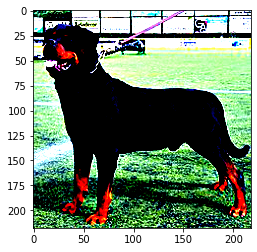

In [ ]:
#Transformo mi imagen pasandola por la función
img_t = process(img)
batch = torch.unsqueeze(img_t,0) #Le agrego una dimención adicional porque el modelo así lo requiere

plt.imshow(img_t.permute(1,2,0)) #Se transpone la imagen preprocesada y se grafica esta permutandola

### Ver que trae el modelo que importé

In [ ]:
inceptions.eval() #Ver que trae el modelo que importé

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

### Salida del modelo

Se genera un tensor llamado ‘out’ de uno dimensión con 1000 elementos (la misma cantidad de elementos que de etiquetas que reconoce el modelo). Cada elemento del tensor es un peso que es mayor o menor según el batch (la imagen enviada) se parezca a la etiqueta. Es decir:
Si la etiqueta en la posición 5 es “goldenfish” entonces el tensor en la posición 5 ( out[0][5] ) tendrá un valor muy pequeño pues en el ejemplo de la clase la entrada es un “golden retriever”.
Entonces si por ejemplo la etiqueta “golden retriever” está en la posición 200 entonces el valor del tensor en la psoción 200 (out[0][200]) será el más alto pues la etiqueta tendrá la mayor coincidencia con el batch (la foto del golden).

En la parte de:

In [ ]:
out = inceptions(batch) #Estos números son la imagen luego de pasar por la red 
out

tensor([[ 1.0192e+00,  9.1124e-01, -1.3832e-01, -3.4765e-02, -1.9372e+00,
          9.5381e-01,  2.0864e-01, -9.6959e-01, -1.3968e+00, -8.8193e-01,
          2.7661e+00,  1.7868e+00,  2.7719e+00, -3.3247e-01,  1.7258e+00,
          1.0085e+00, -3.1695e+00, -2.3070e+00, -2.8151e+00,  1.9954e-01,
         -3.8977e-01, -1.9139e+00,  8.6292e-01,  9.7413e-02,  1.0750e+00,
         -1.6837e-01,  1.0352e+00,  1.4151e+00,  2.2231e-02,  1.7187e+00,
          5.3348e-01, -1.4474e+00, -2.3635e+00,  6.6686e-01,  1.8828e-01,
         -1.4125e+00, -7.8158e-01, -1.3644e+00,  3.7100e-02, -9.9477e-01,
         -7.2181e-01, -4.2502e-01, -1.0995e+00, -8.7041e-01,  3.4584e-01,
         -3.1973e+00, -1.1951e+00, -1.3580e+00, -1.1748e+00, -2.4270e-01,
         -4.5767e-01,  5.7613e-01, -1.4787e+00, -2.3337e+00, -1.4083e+00,
         -6.0034e-01, -4.1515e-01, -6.7776e-02, -1.9770e-01,  2.3260e-01,
          1.9811e-01,  1.5557e+00,  9.0612e-01,  1.0742e+00,  1.2454e+00,
          6.5324e-01, -6.0869e-01,  2.

### Etiquetar la imagen

In [ ]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]


In [ ]:
# Se indexa el max de la salida , para luego poder buscar la etiqueta correspondiente con ese valor
_, index = torch.max(out, 1)

torch.max(out) regresa el valor mayor y el indice en el que se encuentra ese valor. Si pensamos en lo que se explica arriba el indice del valor mayor corresponde al índice de la etiqueta con mayor parecido al batch.
por lo que ‘index’ es un tensor de cuyo único valor es el índice del valor mayor (el de mayor coincidencia con el batch).

In [ ]:
# Se obtiene el porcentaje del valor máximo de aproximación en las coincidencias de identificación de la imagen:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()


('Rottweiler', 99.9932861328125)

**torch.nn.functional.softmax(out, dim=1)** Lo que hace es regresar un tensor el cual normaliza los valores de ‘out’ a valores entre 1 y 0. De manera que el valor más pequeño en ‘out’ estará muy cercano a 0 en el tensor ‘percentage’ y el valor más grande en ‘out’ será cercano a 1 en ‘percentage’.

**torch.nn.functional.softmax(out, dim=1)[0]** regresa todos los valores y

**torch.nn.functional.softmax(out, dim=1)[0]*100** simplemente los multiplica para que aparezcan en forma de porcentage.

‘labels’ dijimos que es una lista con todas las etiquetas del modelo.

index es un tensor que tiene un solo elemento igual al índice de la etiqueta de mayor parecido al batch y index[0] regresa el valor. Por lo que:
labels[ index[0] ] Regresa el elementos en ‘labels’ cuya posición es index[0] osea el elemento con mayor parecido al batch.
percentage[ index[0] ] Regresa el porcentaje de la coincidencia más alta entre etiqueta y batch y la extensión .item() lo que hace es regresar solo el valor y no un tensor.

### Otros posibles resultados

Ordeno decendiente, para ver las salidas con más probabilidad, de esas salidad le tomo el indice, para buscar las etiquetas que correspondan con essos indices

In [ ]:

_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

Rottweiler 99.9932861328125
Doberman, Doberman pinscher 0.004324453882873058
muzzle 0.0019151598680764437
black-and-tan coonhound 0.00026448635617271066
Greater Swiss Mountain dog 0.00017399233183823526


# Dataset

In [3]:
data_path = 'data/'
dataset = datasets.CIFAR10(data_path,train=True,download=True)
validation_set = datasets.CIFAR10(data_path,train=False,download=True)


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [4]:
# Descargo las calses de las imagenes del dataset
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
len(dataset)

50000

'truck'

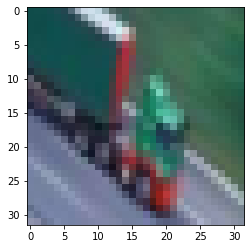

In [8]:
img , label = dataset[50]
plt.imshow(img)
classes[label]

In [9]:
# Paso la imagen a un tensor
tensor_transform = transforms.ToTensor()
img_tensor = tensor_transform(img)
img_tensor

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

### Cargart todo el dataset como tensor

In [10]:
dataset = datasets.CIFAR10(data_path,train=True,download=True,transform=transforms.ToTensor())

#Ahora ya no me da un formato de imagen, si no que me trae todo las imagenes como tensores
img , label = dataset[50]
img

Files already downloaded and verified


tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [12]:
# Veo el rango de los númeos en el tensor
img.min(),img.max()

(tensor(0.0314), tensor(0.9529))

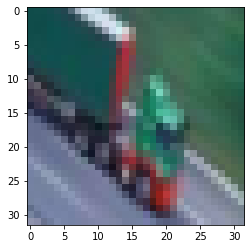

In [16]:
plt.imshow(img.permute(1,2,0))

sin permutarlo no lo entenderá el método y habrá un error, es decir, no lo entiende porque en lugar de ser [X][Y][Z] -> ([0][1][2]), es
[Z][X][Y] -> ([0][1][2]), siendo entonces [Z] la dimensión [0], [X] la [1], y [Y] la [2], con el se ve entonces que recuadra todo permute([X][Y][Z]) = permute(1,2,0).

In [20]:
# Agrupo todos los tensores en un stack 
imgs = torch.stack([image_tensor for image_tensor,_ in dataset],dim=3)

In [21]:
imgs.shape

torch.Size([3, 32, 32, 50000])

Ya que tengo los datos organizados en un stack, ahora se me hace más fácil el cálculo de la media y std. Para ello priemro agrupo los datos en 3 rows del tamaño de columnas necesarios, luego le saco el mean y std a esas 3 filas

Le estamos diciendo que vamos a separa los valores por cada color y tendremos un tensor de 3 filas correspondientes a los tres colores RGB, con 51200000 columnas que es la multiplicacion de 32x32 pixeles que tiene cada imagen por las 50000 imagenes, en resumen hacemos un promedio para el valor de cada color RGB de todas las imagenes

In [36]:
mean = imgs.view(3,-1).mean(dim=1) #Lo que hago aquí es reacomodar y sacar el promedio
std  = imgs.view(3,-1).std(dim=1)
mean,std

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

Ahora con estos parámetros ya puedo hacer una transformación normalizadacomo, como son varias las transformaciones que hay que hacer se hace una composición de transformaciones con el método ".Compose()"
dentro de este se coloca como parametros la transformación a Tensor y la normalizacion con “.Normalize((mean), (std))”.

In [39]:
transform_t = transforms.Compose([
                                  transforms.ToTensor(),
                                  transforms.Normalize(
                                             (0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616)         
                                  )
]) 

In [40]:
# Trago otra vez el dataset, pero ahora le paso la nueva transformación
dataset = datasets.CIFAR10(data_path,train=True,download=True,transform=transform_t)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


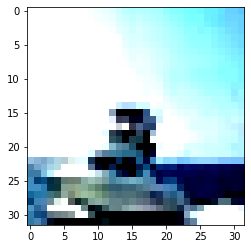

'ship'

In [45]:
#Para probar que todo lo que hicimos esta bien, traemos una imagen
img_transformed,label = dataset[100]

plt.imshow(img_transformed.permute(1,2,0))
plt.show()
classes[label]